# Random walk in two dimensions

A random walk is a sequence where decide randomly in which direction we can move. For example, in a one-dimensional random walk, we decide randomly if we move left or right.
We could take a coin, toss it and move right if it shows "head", or left if it shows "tail".

Similarly, in a two-dimensional random walk, we need to decide if we move up, down, left, or right.

In the simplest case, we aways take steps of the same length, but we could also vary our step size and take short, medium, or long steps.

### Exercise:

* Write a program that contains a function to create data from a 2D random walk where we take 5000 steps. 
  * Let each random walk start at (0,0), i.e., the first pair of values is $x=0, y=0$. 
  * Make the step size an optional parameter, the step size is fixed for a complete random walk.
  * Hint: Think about what the function should return.
* Plot multiple random walks on top of each other. \
* Calculate the distance of between the start and the end of each random walk. \
* For 200 random walks, create a histogram of the distribution of the distance.


*Hint*: 
* Think about which modules can help you so that your code is efficient and fast.
* Numpy provides various random number generators in the sub-module ```np.random```

In [2]:
# all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


#### Solution 1

We calculate all loops ourselves, as well as the Eucledian distance $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$



In [35]:

def random_walk(n_steps = 5000, step_size = 1):

    # we always start at (0,0)
    x_points = [0]
    y_points = [0]

    # do the random walk:
    for i in range(0, n_steps):
        # choose direction:
        x_dir = np.random.choice([-1, 1])
        y_dir = np.random.choice([-1, 1])

        # calculate new positions: last position + step_size * direction
        new_x = x_points[-1] + step_size * x_dir
        new_y = y_points[-1] + step_size * y_dir

        # append to arrays
        x_points.append(new_x)
        y_points.append(new_y)

    # calculate distance between start and end as Eucledian distance
    # NumPy returns an np.array, we just need the value, so we return the 0th element
    distance = np.sqrt( (x_points[-1] - [x_points[0]] )**2 + (y_points[-1] - y_points[0] )**2)
    

    return x_points, y_points, distance[0]


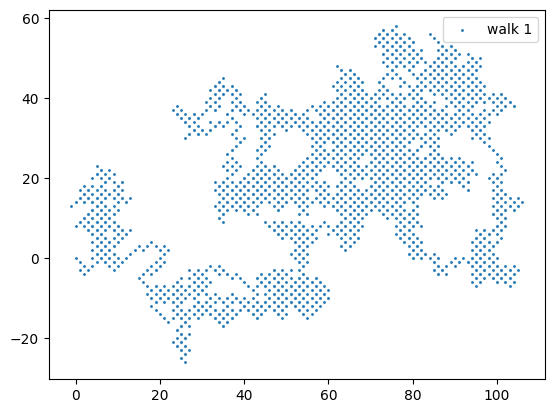

Starting point (0,0), end point (84,56), distance between them 100.9554357129917


In [36]:
x_points, y_points, distance = random_walk()

# the parameter "s" changes the size of the markers
sns.scatterplot(x=x_points, y=y_points, label='walk 1', s=5)
plt.show()

print('Starting point ({},{}), end point ({},{}), distance between them {}'.format(x_points[0], y_points[0],
                                                                                   x_points[-1], y_points[-1], distance) )

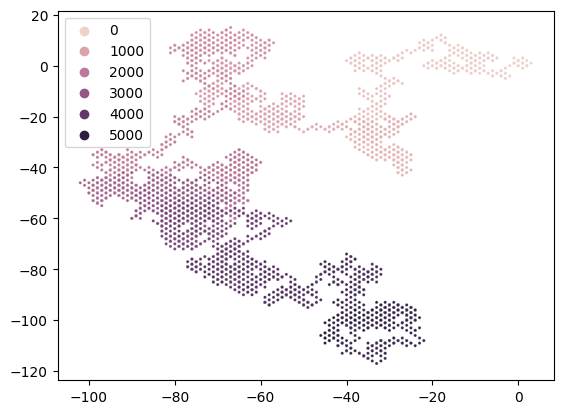

In [19]:
# we can colour code where the random walk goes to

walk_range = range(0, len(x_points))
sns.scatterplot(x=x_points, y=y_points, hue=walk_range, s=5)
plt.show()

In [40]:
# now do 200 random walks and plot the distance distribution
# here we are not interested in the other return values, we ignore them and use underscores to signify this.

distances = []

for i in range(0,200):
    _, _, distance = random_walk()
    distances.append(distance)


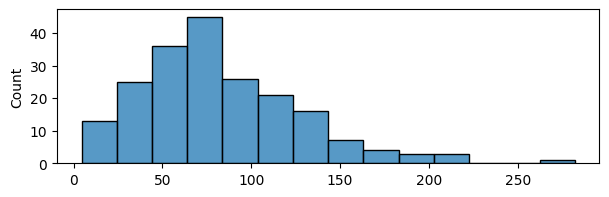

In [41]:
fig, ax = plt.subplots(ncols=1,figsize=(7, 2))

sns.histplot(x=distances)
plt.show()

#### Solution 2

The above solution works well, but is quite slow as we do all the loops ourselves.
Let's see if we can make this a bit more efficient.

Looking at the NumPy documentation for [np.choice](https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html#numpy.random.choice), we see that we can generate the numbers in bulk, without a loop.

We can also multiply the whole array in one step for the step-size.

Then we can use the cumulative sum to calculate the path: [np.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)



In [83]:
def random_walk_2(n_steps = 5000, step_size = 1):
    
    # we always start at (0,0)
    x_points = [0]
    y_points = [0]

    # get the steps
    x_steps = np.random.choice([-1, 1], n_steps) * step_size
    y_steps = np.random.choice([-1, 1], n_steps) * step_size

    x_points = np.concatenate( (x_points, x_steps) ).cumsum(0)
    y_points = np.concatenate( (y_points, y_steps) ).cumsum(0)

    start_point = np.array( (x_points[0], y_points[0]) )
    end_point = np.array( (x_points[-1], y_points[-1]) )

    distance = np.linalg.norm(end_point - start_point)

    return x_points, y_points, distance
    


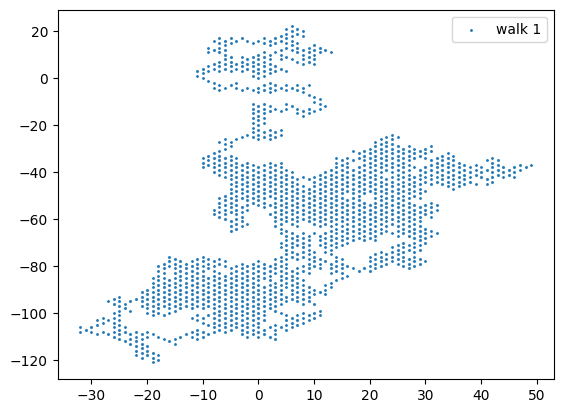

Starting point (0,0), end point (-16,-78), distance between them 79.62411694957753


In [85]:
x_points, y_points, distance = random_walk_2()

sns.scatterplot(x=x_points, y=y_points, label='walk 1', s=5)
plt.show()

print('Starting point ({},{}), end point ({},{}), distance between them {}'.format(x_points[0], y_points[0],
                                                                                   x_points[-1], y_points[-1], distance) )

#### Solution 3

Instead of calculating x and y direction separately, we can handle both of them at the same time, using two-dimensional arrays.

NumPy provides a convient function to create arrays that are initialised with zeros: [np.zero](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). There is a corresponding function for initialising an array with ones.

In [88]:
def random_walk_3(n_steps = 5000, step_size = 1, n_dim = 2):
    
    start_point = np.zeros( (1, n_dim))

    steps = np.random.choice([-1, 1], size=(n_steps, n_dim)) * step_size

    points = np.concatenate( (start_point, steps) ).cumsum(0)

    end_point = points[-1:]

    distance = np.linalg.norm(end_point - start_point)

    # because we now have two dimensional arrays, we return the two dimensions separately 
    # We do this so that the overall behaviour of the function remains the same as before.
    return points[:,0], points[:,1],  distance

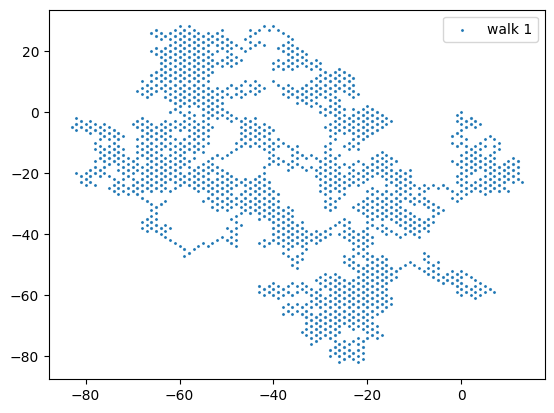

Starting point (0.0,0.0), end point (-8.0,-46.0), distance between them 46.69047011971501


In [90]:
x_points, y_points, distance = random_walk_3()

sns.scatterplot(x=x_points, y=y_points, label='walk 1', s=5)
plt.show()

print('Starting point ({},{}), end point ({},{}), distance between them {}'.format(x_points[0], y_points[0],
                                                                                   x_points[-1], y_points[-1], distance) )

In [93]:
distances = []

for i in range(0,200):
    _, _, distance = random_walk_3()
    distances.append(distance)

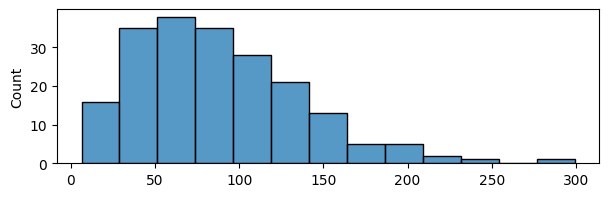

In [94]:
fig, ax = plt.subplots(ncols=1,figsize=(7, 2))

sns.histplot(x=distances)
plt.show()

## Comparing the solutions

We can now profile how long the different approaches take:

We use the "magic" function ```%%time``` to do this.

As we will see, our manual implementation works well - but is also very slow. \
Using NumPy bulk operations (Solution 2) on x and y separately already brings the execution time down a lot.  \
Using two dimentions at the same time (Solution 3) helps us to to cut the execution time down further.

In [97]:
%%time
distances = []

for i in range(0,200):
    _, _, distance = random_walk()
    distances.append(distance)

CPU times: user 11.8 s, sys: 11 ms, total: 11.8 s
Wall time: 11.8 s


In [98]:
%%time
distances = []

for i in range(0,200):
    _, _, distance = random_walk_2()
    distances.append(distance)

CPU times: user 27.1 ms, sys: 0 ns, total: 27.1 ms
Wall time: 26.5 ms


In [99]:
%%time
distances = []

for i in range(0,200):
    _, _, distance = random_walk_3()
    distances.append(distance)

CPU times: user 18.4 ms, sys: 0 ns, total: 18.4 ms
Wall time: 18 ms
